In [2]:
import numpy as np
import pandas as pd
import cPickle as pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analyze Stratified Results
Laying groundwork to share the methods we used for model selection and parameter tuning.  All accuracy scores will be from cross-validation data.  

##Loading data
First list all of the parameter variations we were considering.

In [4]:
def get_results_df(results_path):
    log = pickle.load(open( results_path, "rb" ))
    raw_df = pd.DataFrame.from_dict(log)
    df = raw_df[['strat_column','strat_value','model','best_score','train_accuracy','test_accuracy','num_cases','num_features','num_opinion_shards']]
    return df

def print_weighted_accuracy(df):
    models = df['model'].unique()
    for model in models:
        mdf = df.loc[df['model']==model,:]
        total_cases = sum(mdf['num_cases'])
        weighted_accuracy = sum(mdf['test_accuracy']*mdf['num_cases']/total_cases)
        print "model: %s, weighted accuracy: %s%%" %(model,round(weighted_accuracy*100,1))

In [5]:
results_df = get_results_df("../results/model_results.pkl.20150510-013946.20150510-013946.min_required_count.50.all_features.accuracy.stratified")
results_df

,strat_column,strat_value,model,best_score,train_accuracy,test_accuracy,num_cases,num_features,num_opinion_shards
0,geniss,0,baseline,NaN,1.000000,1.000000,45,20401,500
1,geniss,0,naive_bayes,NaN,1.000000,1.000000,45,20401,500
2,geniss,0,bernoulli_bayes,NaN,1.000000,1.000000,45,20401,500
3,geniss,0,logistic,NaN,1.000000,1.000000,45,20401,500
4,geniss,0,svm,NaN,1.000000,1.000000,45,20401,500
5,geniss,1,baseline,NaN,0.749422,0.748268,1730,20401,500
6,geniss,1,naive_bayes,0.749422,0.749422,0.748268,1730,20401,500
7,geniss,1,bernoulli_bayes,0.749422,0.750193,0.748268,1730,20401,500
8,geniss,1,logistic,0.749422,0.749422,0.748268,1730,20401,500
9,geniss,1,svm,0.749422,0.749422,0.748268,1730,20401,500


In [6]:
print_weighted_accuracy(results_df)

model: baseline, weighted accuracy: 48.5%
model: naive_bayes, weighted accuracy: 51.0%
model: bernoulli_bayes, weighted accuracy: 53.5%
model: logistic, weighted accuracy: 53.2%
model: svm, weighted accuracy: 53.0%


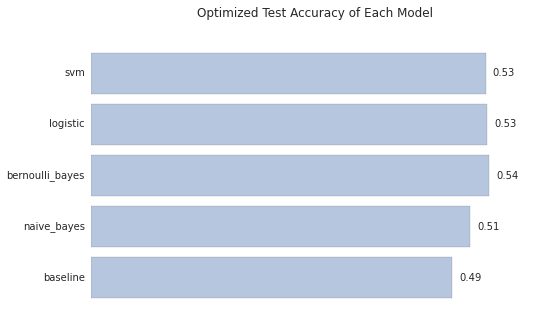

In [8]:
CONTEXT='notebook'
font_size = {
    'paper':8,
    'poster':16,
    'notebook':10,
    'talk':13
}
def chart_weighted_accuracy(df,metric):
    baseline_scores = {'best_score':'train_accuracy','test_accuracy':'test_accuracy'}
    models = df['model'].unique()
    scores = []
    for model in models:
        mdf = df.loc[df['model']==model,:]
        total_cases = sum(mdf['num_cases'])
        
        if model=='baseline':
            weighted_accuracy = sum(mdf[baseline_scores[metric]]*mdf['num_cases']/total_cases)
        else:
            weighted_accuracy = sum(mdf[metric]*mdf['num_cases']/total_cases)
        scores.append(weighted_accuracy)
            
    return models,scores
        
def weighted_accuracy_bars(df,metric,context):
    '''
    df: data frame
    context: paper,talk, notebook, poster
    '''
    
    sns.set_context(context)
    model_list,score_list = chart_weighted_accuracy(df,metric)
    
    #size and position of bars
    bar_pos = np.arange(len(model_list))
    bar_size = score_list
    bar_labels = model_list
    
    #plot
    plt.barh(bar_pos,bar_size, align='center', alpha=0.4)
    plt.yticks(bar_pos, bar_labels)
    plt.xticks([],[]) #no x-axis

    #Add data labels
    for x,y in zip(bar_size,bar_pos):
        plt.text(x+0.01, y, '%.2f' % x, ha='left', va='center',fontsize=font_size[context])
        
    pretty_metric = {'test_accuracy':'Test','best_score':'CV'}
    plt.title('Optimized %s Accuracy of Each Model' % pretty_metric[metric])
    plt.savefig('foo.png', bbox_inches='tight')
    
weighted_accuracy_bars(results_df,'test_accuracy',CONTEXT)

#Same results, but with Mixed and Unknown Valences removed

In [ ]:
results_df = get_results_df("../results/model_results.pkl.20150510-022044.20150510-022044.min_required_count.50.all_features.accuracy")
results_df

In [ ]:
print_weighted_accuracy(results_df)

In [ ]:
STRAT_COLUMN=None
print 'stratify_by_'+STRAT_COLUMN if STRAT_COLUMN else ''

In [ ]:
def print_weighted_accuracy(df):
    models = df['model'].unique()
    for model in models:
        mdf = df.loc[df['model']==model,:]
        total_cases = sum(mdf['num_cases'])
        weighted_accuracy = sum(mdf['test_accuracy']*mdf['num_cases']/total_cases)
        print "model: %s, weighted accuracy: %s%%" %(model,round(weighted_accuracy*100,1))
